# Train

In [3]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snsb
import plotly.express as px

In [6]:
# Data
train=pd.read_csv('train.csv',index_col=0)
train.head()

CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
id                                                                       
0             525.0               0.0              0.0           186.0   
1             143.0             169.0            143.0           191.0   
2             289.0             134.7              0.0           185.7   
3             304.0              76.0              0.0           228.0   
4             157.0             236.0              0.0           192.0   

    SuperplasticizerComponent  CoarseAggregateComponent  \
id                                                        
0                         0.0                    1125.0   
1                         8.0                     967.0   
2                         0.0                    1075.0   
3                         0.0                     932.0   
4                         0.0                     935.4   

    FineAggregateComponent  AgeInDays  Strength  
id                                               
0                    613.0          3     10.38  
1                    643.0         28     23.52  
2                    795.3         28     36.96  
3                    670.0        365     39.05  
4                    781.2         90     74.19

In [12]:
# Shape and info
print('Shape: ',train.shape)
train.info()

Shape:  (5407, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5407 entries, 0 to 5406
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            5407 non-null   float64
 1   BlastFurnaceSlag           5407 non-null   float64
 2   FlyAshComponent            5407 non-null   float64
 3   WaterComponent             5407 non-null   float64
 4   SuperplasticizerComponent  5407 non-null   float64
 5   CoarseAggregateComponent   5407 non-null   float64
 6   FineAggregateComponent     5407 non-null   float64
 7   AgeInDays                  5407 non-null   int64  
 8   Strength                   5407 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 422.4 KB


In [13]:
# Stats
train.describe()

CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
count      5407.000000       5407.000000      5407.000000     5407.000000   
mean        299.168189         58.610579        31.872795      185.076235   
std         105.537682         83.417801        54.605003       18.517583   
min         102.000000          0.000000         0.000000      121.800000   
25%         213.700000          0.000000         0.000000      175.100000   
50%         297.200000          0.000000         0.000000      187.400000   
75%         375.000000        122.600000        79.000000      192.000000   
max         540.000000        359.400000       200.100000      247.000000   

       SuperplasticizerComponent  CoarseAggregateComponent  \
count                5407.000000               5407.000000   
mean                    4.108441                992.000718   
std                     5.692296                 77.148010   
min                     0.000000                801.000000   
25%                     0.000000                938.200000   
50%                     0.000000                978.000000   
75%                     8.050000               1047.000000   
max                    32.200000               1145.000000   

       FineAggregateComponent    AgeInDays     Strength  
count             5407.000000  5407.000000  5407.000000  
mean               771.219974    51.751618    35.452071  
std                 78.725253    70.006975    16.401896  
min                594.000000     1.000000     2.330000  
25%                734.300000     7.000000    23.640000  
50%                781.200000    28.000000    33.950000  
75%                821.000000    56.000000    45.850000  
max                992.600000   365.000000    82.600000

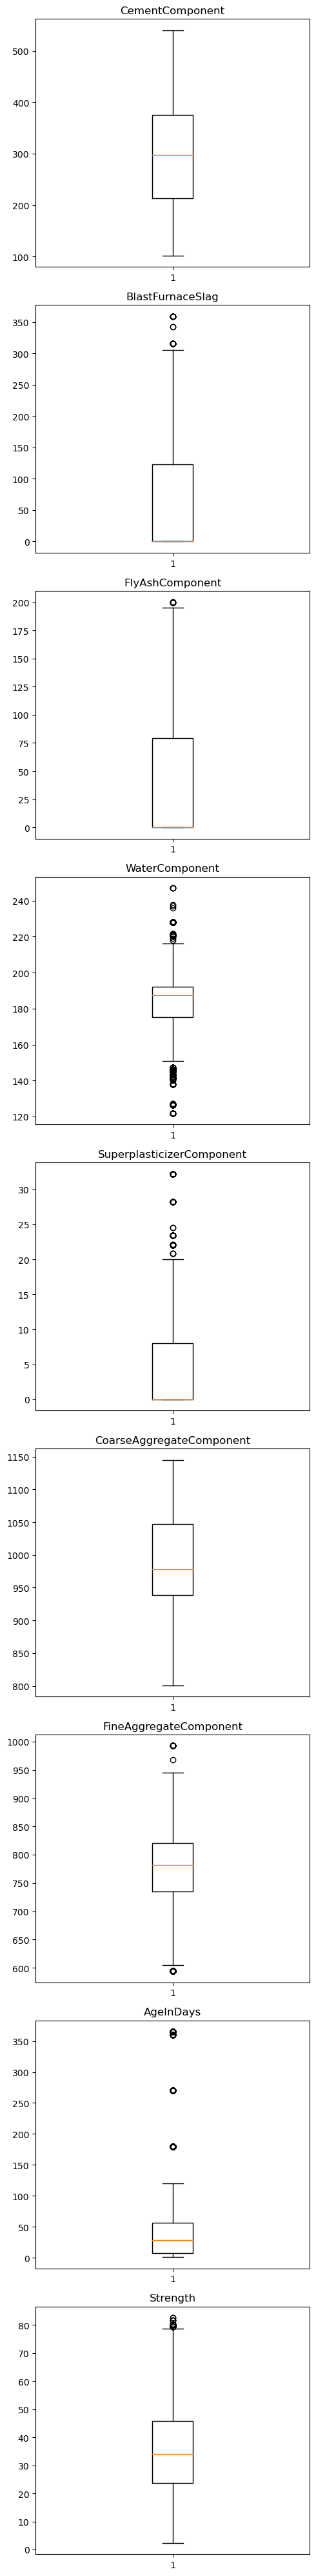

In [85]:
# FInding extereme Values
fliers={}
c=1
plt.figure(figsize=(5,40))

for i in train.columns:
    plt.subplot(9,1,c)
    c+=1
    box=plt.boxplot(train[i])
    plt.title(i)
    fliers[i]=[i.get_ydata() for i in box['fliers']]
    

plt.tight_layout()
plt.show()

In [125]:
count={}
for i in fliers.keys():
    count[i]=(len(fliers[i][0])/len(train[i]))*100
print(count)

{'CementComponent': 0.0, 'BlastFurnaceSlag': 0.3883854262992417, 'FlyAshComponent': 0.0924727205474385, 'WaterComponent': 8.93286480488256, 'SuperplasticizerComponent': 1.3870908082115776, 'CoarseAggregateComponent': 0.0, 'FineAggregateComponent': 2.8296652487516183, 'AgeInDays': 8.636952099130756, 'Strength': 0.6103199556130942}


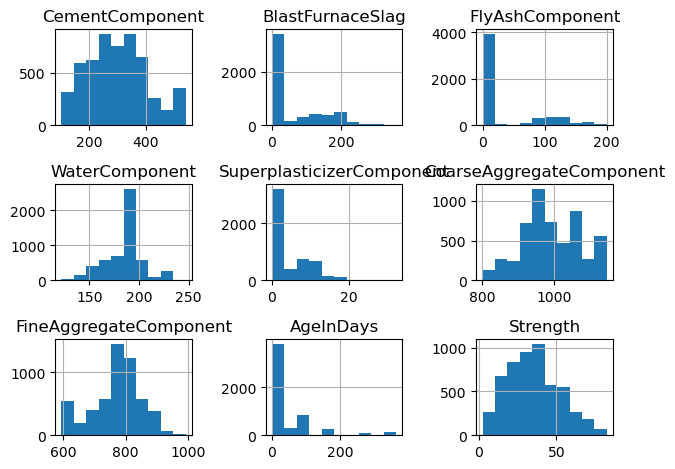

In [33]:
train.hist()
plt.tight_layout()
plt.show()

In [34]:
train.skew()

CementComponent              0.341278
BlastFurnaceSlag             1.121204
FlyAshComponent              1.304692
WaterComponent              -0.215282
SuperplasticizerComponent    1.411689
CoarseAggregateComponent    -0.081453
FineAggregateComponent      -0.447378
AgeInDays                    2.746870
Strength                     0.380732
dtype: float64

In [35]:
train.kurtosis()

CementComponent             -0.546574
BlastFurnaceSlag             0.004654
FlyAshComponent              0.096250
WaterComponent               0.837698
SuperplasticizerComponent    2.200681
CoarseAggregateComponent    -0.560611
FineAggregateComponent      -0.007122
AgeInDays                    8.274822
Strength                    -0.356449
dtype: float64

>Pathetic Shape

In [38]:
from pandas_profiling import ProfileReport
profile=ProfileReport(train)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

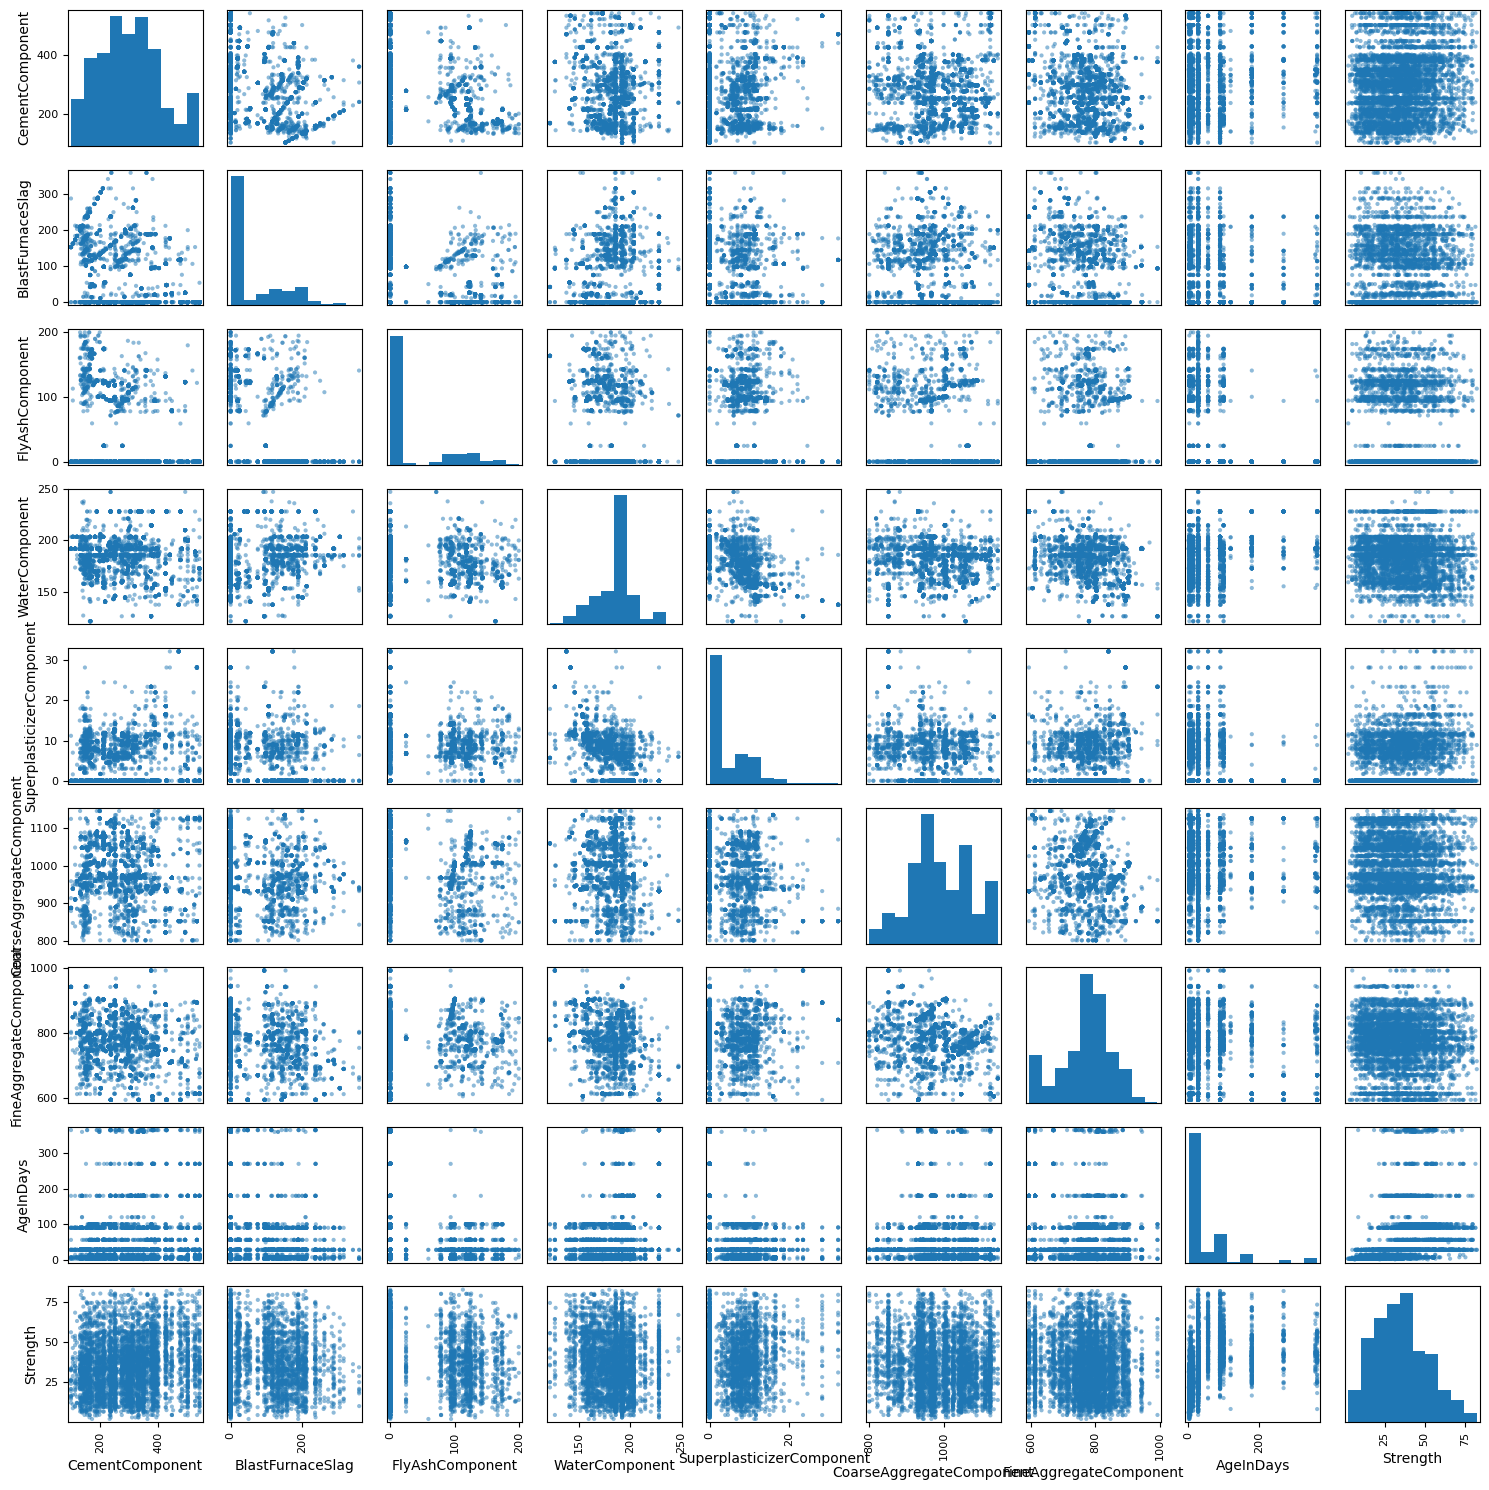

In [225]:
pd.plotting.scatter_matrix(train,figsize=(15,15))
plt.tight_layout()
plt.show()

# Test

In [42]:
test=pd.read_csv('test.csv',index_col=0)

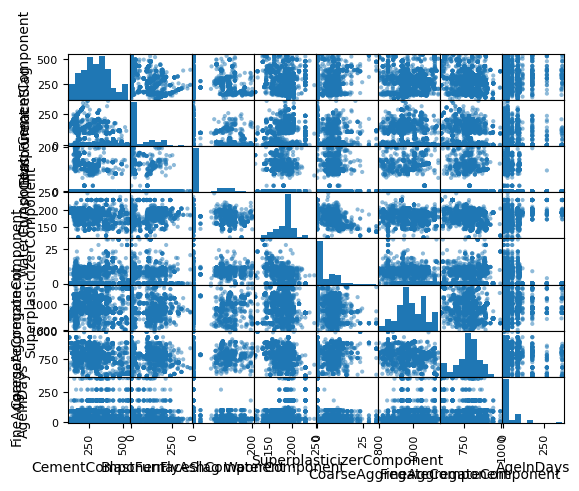

In [226]:
pd.plotting.scatter_matrix(test)
plt.show()

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3605 entries, 5407 to 9011
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            3605 non-null   float64
 1   BlastFurnaceSlag           3605 non-null   float64
 2   FlyAshComponent            3605 non-null   float64
 3   WaterComponent             3605 non-null   float64
 4   SuperplasticizerComponent  3605 non-null   float64
 5   CoarseAggregateComponent   3605 non-null   float64
 6   FineAggregateComponent     3605 non-null   float64
 7   AgeInDays                  3605 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 253.5 KB


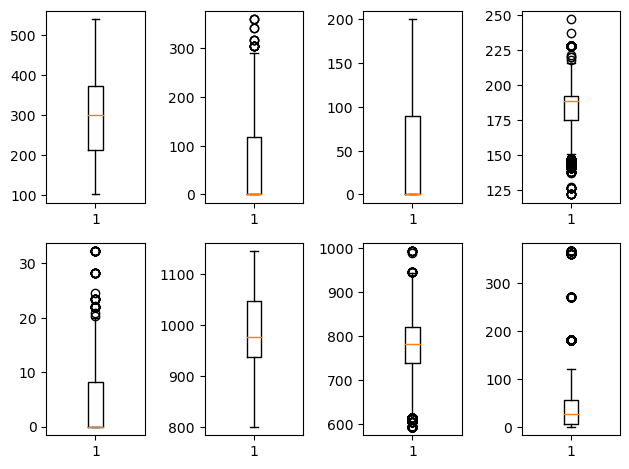

In [70]:
c=1
fliers={}
for i in test.columns:
    plt.subplot(2,4,c)
    c+=1
    box=plt.boxplot(test[i])
    fliers[i]=[i.get_ydata() for i in box['fliers']]

plt.tight_layout()
plt.show()

In [119]:
count={}
for i in fliers.keys():
    count[i]=len(fliers[i][0]) 
print(count)

{'CementComponent': 0, 'BlastFurnaceSlag': 21, 'FlyAshComponent': 5, 'WaterComponent': 483, 'SuperplasticizerComponent': 75, 'CoarseAggregateComponent': 0, 'FineAggregateComponent': 153, 'AgeInDays': 467, 'Strength': 33}


In [120]:
count={}
for i in fliers.keys():
    count[i]=len(fliers[i][0])/len(train[i])*100
print(count)

{'CementComponent': 0.0, 'BlastFurnaceSlag': 0.3883854262992417, 'FlyAshComponent': 0.0924727205474385, 'WaterComponent': 8.93286480488256, 'SuperplasticizerComponent': 1.3870908082115776, 'CoarseAggregateComponent': 0.0, 'FineAggregateComponent': 2.8296652487516183, 'AgeInDays': 8.636952099130756, 'Strength': 0.6103199556130942}


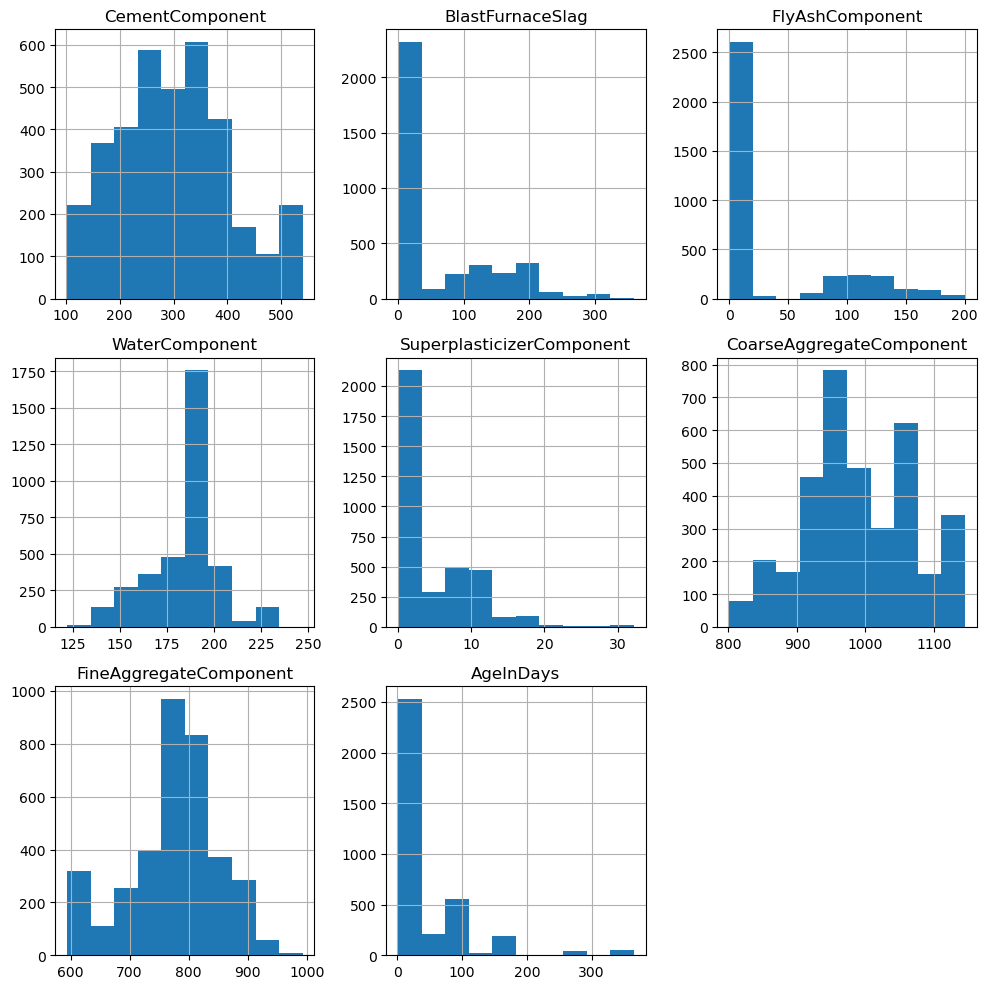

In [75]:
test.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [77]:
train.skew()

CementComponent              0.341278
BlastFurnaceSlag             1.121204
FlyAshComponent              1.304692
WaterComponent              -0.215282
SuperplasticizerComponent    1.411689
CoarseAggregateComponent    -0.081453
FineAggregateComponent      -0.447378
AgeInDays                    2.746870
Strength                     0.380732
dtype: float64

In [76]:
test.skew()

CementComponent              0.321378
BlastFurnaceSlag             1.155207
FlyAshComponent              1.277012
WaterComponent              -0.337090
SuperplasticizerComponent    1.474013
CoarseAggregateComponent    -0.091104
FineAggregateComponent      -0.428945
AgeInDays                    2.732880
dtype: float64

Model

In [126]:
train.columns

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

In [127]:
X,Y=train.iloc[:,:-1],train.Strength

In [161]:
from sklearn.manifold import TSNE

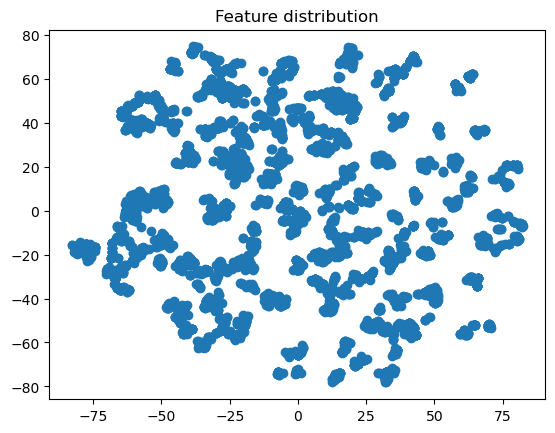

In [162]:
tsne=TSNE()
comp=pd.DataFrame(tsne.fit_transform(X),columns=['a','b'])
plt.scatter(comp.a,comp.b)
plt.title('Feature distribution')
plt.show()

In [175]:
from sklearn.decomposition import PCA

pca=PCA()

pca.fit(X)


PCA()

In [177]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36508094, 0.57264176, 0.74612232, 0.87199978, 0.95653147,
       0.99512084, 0.99970118, 1.        ])

In [178]:
pcs=pd.DataFrame(PCA(5).fit_transform(X),columns=[f'V{i}' for i in range(1,6)])
pcs

V1          V2          V3          V4          V5
0     284.153531   55.899352  -98.922955  -82.571608   -0.492550
1    -154.485217  122.006794  -83.124020  -20.920581  143.160219
2     -26.633693   33.371075  -57.058350  -26.900244  -82.462809
3      54.358051  125.990174   32.869321  303.353173   49.378945
4    -190.929645  131.251987   19.987069   43.998241  -38.084667
...          ...         ...         ...         ...         ...
5402  137.843633   10.733959   42.095345  -75.293291   67.048283
5403   77.584490  -16.617180   38.391472  126.386871   -7.327158
5404   40.439633  -44.231638  -81.053510  -14.086854  -33.632225
5405   79.019231  106.104259   19.810984  -43.746381   25.574476
5406  -64.070766  -85.738118 -122.438007   21.906692   65.711686

[5407 rows x 5 columns]

In [165]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
x_scl=pd.DataFrame(std.fit_transform(X),columns=X.columns)
x_scl.head()

CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0         2.140020         -0.702680        -0.583751        0.049890   
1        -1.479876          1.323454         2.035299        0.319929   
2        -0.096355          0.912233        -0.583751        0.033688   
3         0.045787          0.208481        -0.583751        2.318215   
4        -1.347209          2.126714        -0.583751        0.373937   

   SuperplasticizerComponent  CoarseAggregateComponent  \
0                  -0.721821                  1.724109   
1                   0.683717                 -0.324092   
2                  -0.721821                  1.075944   
3                  -0.721821                 -0.777807   
4                  -0.721821                 -0.733732   

   FineAggregateComponent  AgeInDays  
0               -2.009960  -0.696447  
1               -1.628853  -0.339306  
2                0.305903  -0.339306  
3               -1.285856   4.474945  
4                0.126782   0.546402

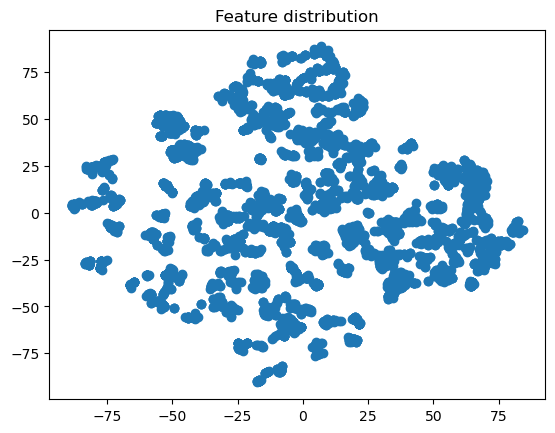

In [166]:
tsne=TSNE()
comp=pd.DataFrame(tsne.fit_transform(x_scl),columns=['a','b'])
plt.scatter(comp.a,comp.b)
plt.title('Feature distribution')
plt.show()

In [156]:
# from sklearn.preprocessing import StandardScaler

# scaler=StandardScaler()


Train set and test set are statistically identica;

In [187]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20)

In [188]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [189]:
pred=lr.predict(x_test)

In [190]:
np.sqrt(mean_squared_error(y_test,pred))

14.596619325171167

In [201]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

models=[]

xgb=XGBRegressor()
models.append(('xgb1',xgb))
xgb1=XGBRegressor()
models.append(('xgb2',xgb1))
xgb2=XGBRegressor()
models.append(('xgb3',xgb2))
xgb3=XGBRegressor()
models.append(('xgb4',xgb3))
xgb4=XGBRegressor()
models.append(('xgb5',xgb4))
xgb5=XGBRegressor()
models.append(('xgb6',xgb5))
xgb6=XGBRegressor()
models.append(('xgb7',xgb6))
xgb7=XGBRegressor()
models.append(('xgb8',xgb7))
xgb8=XGBRegressor()
models.append(('xgb9',xgb8))
xgb9=XGBRegressor()
models.append(('xgb10',xgb9))
xgb10=XGBRegressor()
models.append(('xgb11',xgb10))
xgb11=XGBRegressor()
models.append(('xgb12',xgb11))
xgb12=XGBRegressor()
models.append(('xgb13',xgb12))



In [220]:
# define hyperparameters to tune
parameters = {'nthread':[4], # number of threads to use for parallel processing
              'objective':['reg:linear'], # objective function for regression
              'learning_rate': [0.05, 0.1, 0.15], # learning rate for gradient descent
              'max_depth': [5, 6, 7], # maximum depth of the decision trees
              'min_child_weight': [1, 2, 3], # minimum sum of instance weight needed in a child
              'silent': [1], # whether to print messages during training
              'subsample': [0.7, 0.8, 0.9], # subsample ratio of the training instances
              'colsample_bytree': [0.7, 0.8, 0.9], # subsample ratio of columns when constructing each tree
              'n_estimators': [100, 200, 300] # number of trees to build
              }

# create grid search object
grid_search = RandomizedSearchCV(estimator=xgb, param_distributions=parameters, cv=10, n_jobs=-1,verbose=100)

# fit grid search object to the data
grid_search.fit(x_scl, Y)

# print best hyperparameters
print(grid_search.best_params_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[02:09:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[02:09:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

{'subsample': 0.7, 'silent': 1, 'objective': 'reg:linear', 'nthread': 4, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.7}


In [219]:
print(grid_search.best_score_)

0.4521234636051454


In [212]:
xgb=XGBRegressor(subsample= 0.9, silent= 1,  nthread = 4, n_estimators = 100, min_child_weight= 3,
                  max_depth= 5, learning_rate=0.05, colsample_bytree= 0.8)
# xgb=XGBRegressor()
pred=xgb.fit(x_train,y_train).predict(x_test)
pred

[02:04:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



array([38.69822 , 37.830822, 15.707115, ..., 42.764885, 24.210249,
       31.591991], dtype=float32)

In [213]:
np.sqrt(mean_squared_error(y_test,pred))

12.20470692335438

In [214]:
final_pred=xgb.predict(test)

In [215]:
final_df=pd.DataFrame()

In [216]:
final_df['id']=test.index
final_df['Strength']=final_pred
final_df

id   Strength
0     5407  48.812027
1     5408  19.892656
2     5409  34.349480
3     5410  47.564075
4     5411  30.747303
...    ...        ...
3600  9007  33.454594
3601  9008  35.200794
3602  9009  39.126305
3603  9010  34.259716
3604  9011  21.969053

[3605 rows x 2 columns]

In [217]:
final_df.to_csv('submission.csv',index=False)

In [231]:
X.shape

(5407, 8)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import backend as K


nn=Sequential(name='Sequential')

nn.add(Dense(50,activation='relu',input_shape=(8,1),name='Input'))
nn.add(Dense(10,activation='relu',name='Hidden1'))
nn.add(Dense(10,activation='relu',name='Hidden2'))
nn.add(Dense(1,name='Output'))

def rmse(y_true, y_pred):
    return K.sqrt(mean_squared_error(y_true, y_pred))

nn.compile(optimizer='adam',loss='rmse')

In [264]:
nn.summary()

Model: "Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 8, 50)             100       
                                                                 
 Hidden1 (Dense)             (None, 8, 10)             510       
                                                                 
 Hidden2 (Dense)             (None, 8, 10)             110       
                                                                 
 Output (Dense)              (None, 8, 1)              11        
                                                                 
Total params: 731
Trainable params: 731
Non-trainable params: 0
_________________________________________________________________


In [265]:
nn.fit(x_scl,Y,epochs=10,batch_size=10,validation_split=.10)

Epoch 1/10


NotImplementedError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Slmss\AppData\Local\Temp\ipykernel_14600\895741799.py", line 14, in rmse  *
        return K.sqrt(mean_squared_error(y_true, y_pred))
    File "C:\Users\Slmss\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_regression.py", line 441, in mean_squared_error  *
        y_type, y_true, y_pred, multioutput = _check_reg_targets(
    File "C:\Users\Slmss\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_regression.py", line 100, in _check_reg_targets  *
        check_consistent_length(y_true, y_pred)
    File "C:\Users\Slmss\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py", line 395, in check_consistent_length  *
        uniques = np.unique(lengths)
    File "<__array_function__ internals>", line 5, in unique  **
        
    File "C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py", line 270, in unique
        ar = np.asanyarray(ar)

    NotImplementedError: Cannot convert a symbolic tf.Tensor (rmse/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported.
